# Arquitecturas famosas

## LeNet-5 (1998)

### Teoria
La arquitectura LeNet-5

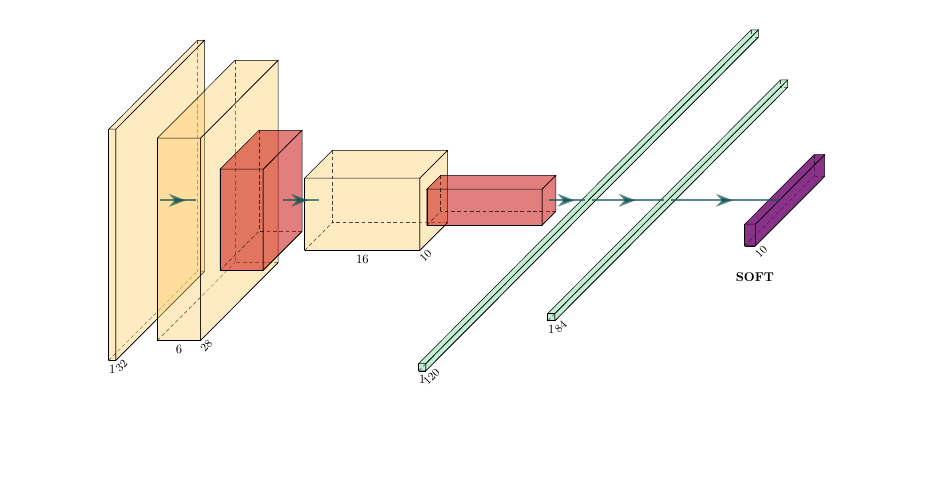

In [1]:
!pip install numpy

Descripcion:



*   2 capas convolucionales
*   2 average pooling
*   2 fully connected layers
*   softmax classification



Comencemos:



*   L0: La de entrada $32 \times 32$ con los datos MNIST
*   L1: Es la primera capa convolucional : Es una convolucion con un "kernel" de $5 \times 5$ no padding $p=0$, stride $s=1$. Hay 6 filtros de salida. La capa se reduce a
$$(N-k + 2p)/s +1   = (32 - 5 )/1 + 1  =28 $$
Parametros de entrenamiento
$$ \text{training parameters} = (5 \times 5 \times 1 + 1) \times 6 = 156 $$

La activacion original es tanh . Aca vamos a usar ReLU que es mejor.

* L2 : Pooling (segunda), conocida como S2.Average pooling, con 6 filtros, kernel es $k_x \times k_y  = 2 \times 2$.  Padding $p=0$, stride $s=2$.
La salida tiene tamano $(28 - 2 + 2(0))/2 + 1 14$, $14 \times 14$
los filtros son 6. La salida es
$$ \text{\# feature maps} = 14 \times 14 \times 6$$

* L3: Otra capa convolucional C3. Usamos 16 filtros de salida. El kernel es de $5 \times 5$, padding $p=0$,
strides $s=1$. La salida sera de $10 \times 10 \times 16$, el numero de parametros de entrenamiento.

$$ \text{\# parametros de entrenamiento} =(5 \times 5 \times 6 + 1) \times 16 $$

*  L4: Average pooling layer (S4). El kernel es de $2 \times 2 \times 16$, stride es $s=2$. los filtros de salida son 16. El tamano de salida es:
$$ (10-2)/2 + 1 = 5$$,  $5 \times 5$


* L5 : La ultima capa convolucional. (C5). El kernel es de $5 \times 5$, el stride es $s=1$. Hay 120 "feature maps". El tamano de salida 
es $5-5+1=1$. La salida queda de $1 \times 1 \times 120$. El numero de parametros
$$\text{# parametros} = (5 \times 5 \times 16 + 1) \times 120 = 48120 $$

* L6: fully connected (F6) se conectan completamente (densa) la L5 con L6.
Hay 84 filtrso de salida
Todos con todos + bias
$$ (120 + 1) \times 84 = 10164 $$

Con esto se hace softmax

# Parte practica: Laboratorio

### Importar librerias

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model


### Cargar datos y repartirlos

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


### Verificar los datos



In [4]:
print("The size of train_x is {}".format(train_x. shape))
print("The size of train_y is {}".format(train_y. shape))
print("The size of test_x is {}".format(test_x. shape))
print("The size of test_y is {}".format(test_y. shape))

The size of train_x is (60000, 28, 28)
The size of train_y is (60000,)
The size of test_x is (10000, 28, 28)
The size of test_y is (10000,)


### Reshaping to 4 order tensors

In [5]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

### Normalizacion

In [6]:
train_x = train_x/255.0
test_x = test_x/255.0

### One-hot-coding the labels

In [7]:
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

### Construccion del modelo

In [8]:
# definir, instanciar
model = Sequential()

# adicionar la capa convolucional
# Input (28 x 28) , originalmente es 32 x 32
# numero de filtros 6
# el tamano del kernel es (5 x 5 )
# padding p=0
# strides s=1
# size of feature map (28-5+ 2*0)/1 + 1 = 24 x 24
# numero de parametros (5 x 5 x 1 + 1)x6 = 156
# la funcion de activacion ReLU (original es tanh)

model.add(Conv2D(filters=6,
                 kernel_size=5,
                 strides=1,
                 activation='relu',
                 input_shape=(28,28,1)))

# pooling layer S2
# input shape (24 x 24)
# filter size (2 x 2)
# padding p=0
# strides s=2
# output size (24-2)/2+1 = 12, (12 x 12)

model.add( AvgPool2D(pool_size=(2,2)))


# Add capa convolucional C3
# input shape (12 x 12 )
# numero de filtros = 16
# tamano del kernel (5 x 5 )
# strides s=1
# padding p=0
# output size (12-5+1=8), (8 x 8)
# numero de parametros (5 x 5 x 6 + 1)x16 = 2416
model.add(Conv2D(filters=16, 
                 kernel_size=(5,5),
                 activation='relu'))

# average pooling layer
# input (8 x 8)
# numero de filtros 16
# tamano del kernel (2 x 2 )
# padding p=0
# strides s =2
# tamano de salida (8-2)/2 + 1 =4,  4 x 4
model.add(AvgPool2D(pool_size=(2,2)))

# en el modelo original hay una conovolucion de mas, por que era 32x32 datos, aca son 28x28
# no alcanza. 
# vamos a "flatten" la capa, queda una capa densa con 256 nodos.
model.add(Flatten())



# agregar capa densa de 120 nodos
# numero de entrada 256
# parametros (120+1)*256 = 30840
model.add( Dense(120, activation='relu'))

# agregar capa densa de 84 nodos
# numero de entrada 120
# numero de salida 84
# parametros (120+1)x84 = 10164 
model.add(Dense(84, activation='relu'))

# capa de clasificacion
# softmax 
# numero de entrada 84
# numero de salida 10
# parametros (84+1)x10 = 850
model.add(Dense(10, activation='softmax'))


# muestre el sumario del modelo
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

### Compliacion y corrida del modelo

In [9]:
model.compile( loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit (train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
469/469 [==============================] - 15s 8ms/step - loss: 0.3654 - accuracy: 0.8917 - val_loss: 0.1582 - val_accuracy: 0.9518
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1270 - accuracy: 0.9610 - val_loss: 0.1132 - val_accuracy: 0.9643
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0691 - val_accuracy: 0.9778
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.0652 - val_accuracy: 0.9791
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0592 - accuracy: 0.9820 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0627 - val_accuracy: 0.9803
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0518 - val_accuracy: 0.9834
Epoch

## Evaluacion Final

In [10]:
score = model.evaluate(test_x, test_y)
print("test loss", score[0])
print("test accuracy", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0416 - accuracy: 0.9881
test loss 0.04158534109592438
test accuracy 0.988099992275238


### Graficar los datos:


In [11]:
import matplotlib.pyplot as plt


def plot_example(X, y, y_pred=None):
    """
        9 graficas
        parametros:
        -X : las muestras de entrenamiento
        -y: true labels
        -y_pred: las predicciones

    """

    # creamos la figura de 3x3
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.99, wspace=0.99)
    fig.set_size_inches(18,18)


    X, y = X[:9, ... , 0], y[:9]

    for i, ax in enumerate(axes.flat):
        # grafico la imagen
        ax.imshow(X[i])

        # las etiquetas
        if y_pred is  None:
            x_label="True: {0}".format(y[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(y[i], y_pred[i])

        # muestra las etiquetas
        ax.set_xlabel(xlabel)

    # removemos los tics
    ax.set_xticks([])
    ax.set_yticks([])

    # muestre la grafica
    plt.show()
        

### Evaluacion final

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt




In [13]:
# salvemos el modelo
model.save("lenet5_model.h5")


model = tf.keras.models.load_model('lenet5_model.h5')

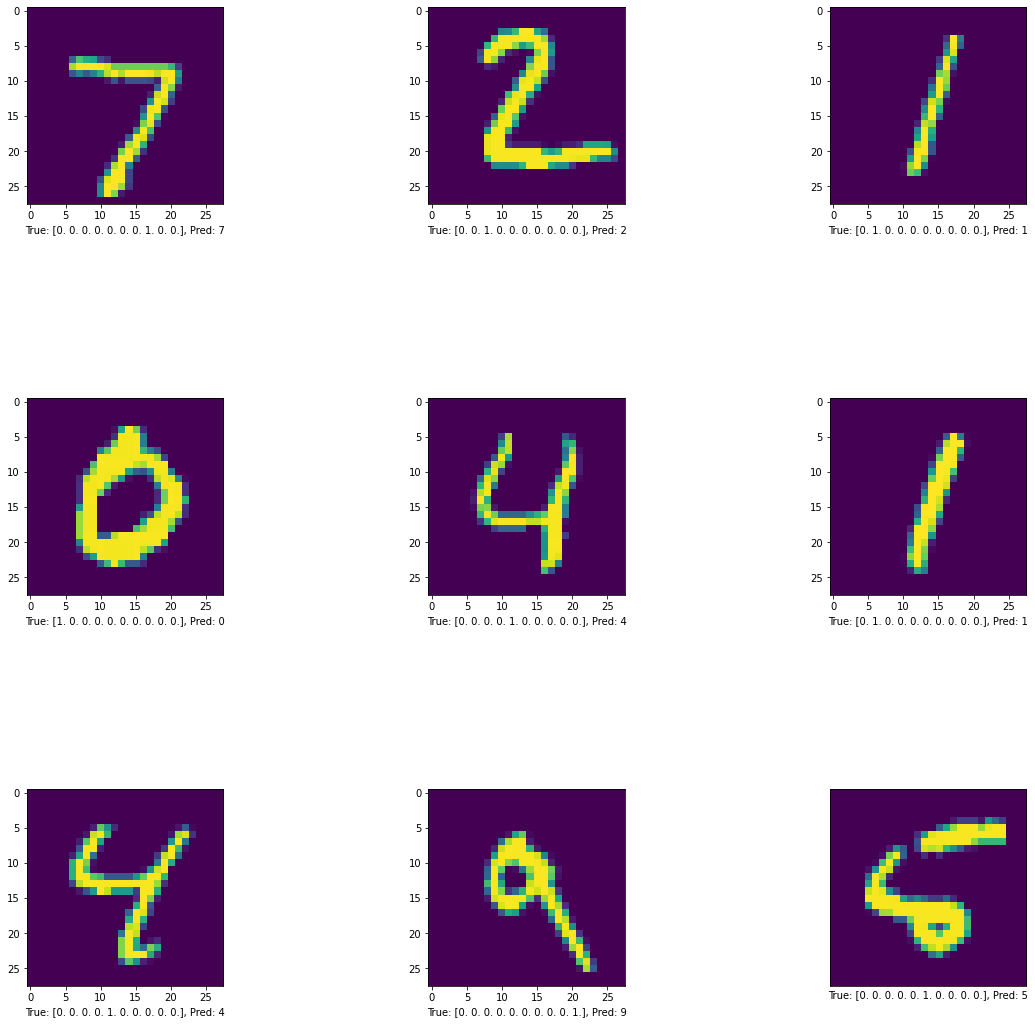

In [14]:

# hacer predicciones
predictions = model.predict(test_x)

# tomemos los uy
pred_y = np.argmax(predictions, axis=1)

# graficar
plot_example(test_x, test_y, pred_y)